## 对比分析

对比分析 → 两个互相联系的指标进行比较

    绝对数比较（相减） / 相对数比较（相除）
    结构分析、比例分析、空间比较分析、动态对比分析


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
data = pd.read_csv('data/second_hand_ house.csv')
data

In [3]:
# 1、绝对数比较 → 相减
# 相互对比的指标在量级上不能差别过大
# （1）折线图比较
# （2）多系列柱状图比较

data = pd.DataFrame(np.random.rand(30,2)*1000,
                   columns = ['A_sale','B_sale'],
                   index = pd.period_range('20170601','20170630'))
print(data.head())

                A_sale      B_sale
2017-06-01  178.504814  317.596616
2017-06-02  948.229866  670.141230
2017-06-03   95.025291  868.571098
2017-06-04  991.298854  657.485013
2017-06-05   67.724123  863.980759


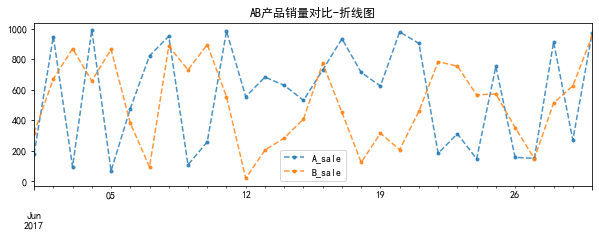

In [4]:
# 创建数据 → 30天内A/B产品的日销售额
# 折线图比较
data.plot(kind='line',
       style = '--.',
       alpha = 0.8,
       figsize = (10,3),
       title = 'AB产品销量对比-折线图')


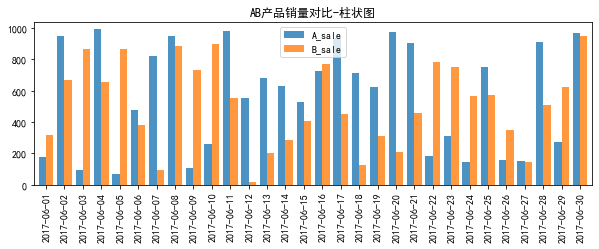

In [5]:
data.plot(kind = 'bar',
          width = 0.8,
          alpha = 0.8,
          figsize = (10,3),
          title = 'AB产品销量对比-柱状图')
# 多系列柱状图比较

### 1、绝对数比较 → 相减
（3）柱状图堆叠图+差值折线图比较

[Text(0, 0, '2017-06-01'),
 Text(0, 0, '2017-06-07'),
 Text(0, 0, '2017-06-13'),
 Text(0, 0, '2017-06-19'),
 Text(0, 0, '2017-06-25')]

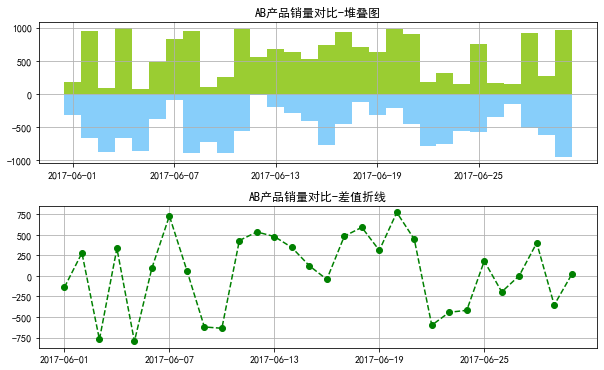

In [6]:
fig3 = plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace=0.3)
# 创建子图及间隔设置

# 创建堆叠图
ax1 = fig3.add_subplot(2,1,1)  
x = range(len(data))
y1 = data['A_sale']
y2 = -data['B_sale']
plt.bar(x,y1,width = 1,facecolor = 'yellowgreen')
plt.bar(x,y2,width = 1,facecolor = 'lightskyblue')
plt.title('AB产品销量对比-堆叠图')
plt.grid()
plt.xticks(range(0,30,6))
ax1.set_xticklabels(data.index[::6])


# 创建差值折线图
ax2 = fig3.add_subplot(2,1,2)  
y3 = data['A_sale']-data['B_sale']
plt.plot(x,y3,'--go')

plt.grid()
plt.title('AB产品销量对比-差值折线')
plt.xticks(range(0,30,6))
ax2.set_xticklabels(data.index[::6])


### 2、相对数比较 → 相除
- 有联系的指标综合计算后的对比，数值为相对数
- 结构分析、比例分析、空间比较分析、动态对比分析、计划完成度分析


#### （1）结构分析
- 在分组基础上，各组总量指标与总体的总量指标对比，计算出各组数量在总量中所占比重
- 反映总体的内部结构

                A_sale      B_sale
2017-06-01    7.046937  181.601299
2017-06-02  331.636217  125.373572
2017-06-03  721.560764   16.112270
2017-06-04  922.751578  131.515905
2017-06-05  975.993165   83.982863
------
                A_sale      B_sale     A_per     B_per A_per% B_per%
2017-06-01    7.046937  181.601299  0.000462  0.054814  0.05%  5.48%
2017-06-02  331.636217  125.373572  0.021744  0.037842  2.17%  3.78%
2017-06-03  721.560764   16.112270  0.047310  0.004863  4.73%  0.49%
2017-06-04  922.751578  131.515905  0.060502  0.039696  6.05%  3.97%
2017-06-05  975.993165   83.982863  0.063992  0.025349  6.40%  2.53%


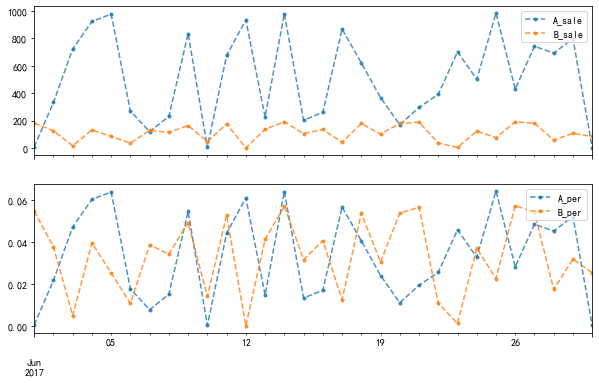

In [7]:
# 创建数据 → 30天内A/B产品的日销售额
# A/B产品销售额量级不同
data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*200},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 计算出每天的营收占比
data['A_per'] = data['A_sale'] / data['A_sale'].sum()
data['B_per'] = data['B_sale'] / data['B_sale'].sum()

# 转换为百分数
data['A_per%'] = data['A_per'].apply(lambda x: '%.2f%%' % (x*100))
data['B_per%'] = data['B_per'].apply(lambda x: '%.2f%%' % (x*100))

print(data.head())

# 绝对值对比较难看出结构性变化，通过看销售额占比来看售卖情况的对比

# 同时可以反应“强度” → 两个性质不同但有一定联系的总量指标对比，用来说明“强度”、“密度”、“普遍程度”
# 例如：国内生产总值“元/人”，人口密度“人/平方公里”
fig,axes = plt.subplots(2,1,figsize = (10,6),sharex=True)
data[['A_sale','B_sale']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[0])
axes[0].legend(loc = 'upper right')
data[['A_per','B_per']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[1])
axes[1].legend(loc = 'upper right')

#### （2）比例分析
- 在分组的基础上，将总体不同部分的指标数值进行对比，其相对指标一般称为“比例相对数”
- 比例相对数 = 总体中某一部分数值 / 总体中另一部分数值 → “基本建设投资额中工业、农业、教育投资的比例”、“男女比例”...

         consumption       salary
2017-01  2924.799374  5449.227469
2017-02  2469.899348  5175.254960
2017-03  2114.597086  5078.703628
2017-04  2582.765359  5434.458561
2017-05  2030.590771  5211.707243
------
         consumption       salary       c_s
2017-01  2924.799374  5449.227469  0.536737
2017-02  2469.899348  5175.254960  0.477252
2017-03  2114.597086  5078.703628  0.416366
2017-04  2582.765359  5434.458561  0.475257
2017-05  2030.590771  5211.707243  0.389621


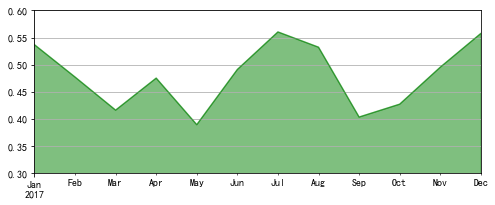

In [8]:
# 创建数据 → 某人一年内的消费、工资薪水情况
# 消费按照2000-3000/月随机，工资按照5000-5500/月随机
data = pd.DataFrame({'consumption':np.random.rand(12)*1000 + 2000,
                    'salary':np.random.rand(12)*500 + 5000},
                   index = pd.period_range('2017/1','2017/12',freq = 'M'))
print(data.head())
print('------')


# 比例相对数 → 消费收入比
data['c_s'] = data['consumption'] / data['salary']
print(data.head())


# 创建面积图表达
data['c_s'].plot.area(color = 'green',alpha = 0.5,ylim = [0.3,0.6],figsize=(8,3),grid=True)

###  （3）空间比较分析（横向对比分析）

- 同类现象在同一时间不同空间的指标数值进行对比，反应同类现象在不同空间上的差异程度和现象发展不平衡的状况
- 空间比较相对数 = 甲空间某一现象的数值 / 乙空间同类现象的数值
- 一个很现实的例子 → 绝对数来看，我国多经济总量世界第一，但从人均水平来看是另一回事

                      A            B            C           D
2017-06-01   528.370896  1216.591284  7397.310895   50.173083
2017-06-02  1013.590591  1410.746640  4952.777393  692.761193
2017-06-03  4501.420960  1395.722666  1920.744241   24.759949
2017-06-04  2022.779048  1119.388104  7220.937061  118.634391
2017-06-05  4662.383239    69.797467  9390.800101  394.755021
------


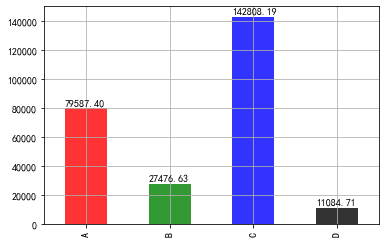

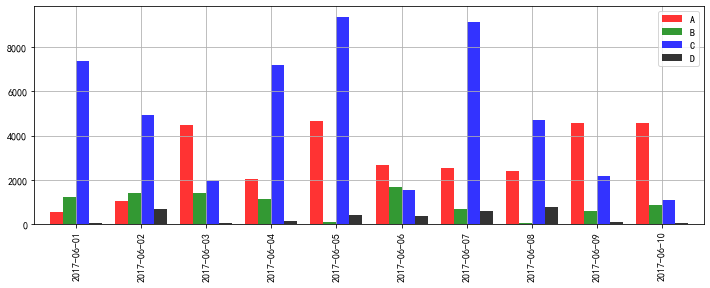

In [9]:
# 创建数据 → 30天内A/B/C/D四个产品的销售情况
# 不同产品的销售量级不同
data = pd.DataFrame({'A':np.random.rand(30)*5000,
                    'B':np.random.rand(30)*2000,
                    'C':np.random.rand(30)*10000,
                    'D':np.random.rand(30)*800},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')

# 通过柱状图做横向比较 → 4个产品的销售额总量
data.sum().plot(kind = 'bar',color = ['r','g','b','k'], alpha = 0.8, grid = True)
for i,j in zip(range(4),data.sum()):
    plt.text(i-0.25,j+2000,'%.2f' % j, color = 'k')

# 多系列柱状图，横向比较前十天4个产品的销售额
data[:10].plot(kind = 'bar',color = ['r','g','b','k'], alpha = 0.8, grid = True, figsize = (12,4),width = 0.8)


### （4）动态对比分析（纵向对比分析）

- 同一现象在不同时间上的指标数值进行对比，反应现象的数量随着时间推移而发展变动的程度及趋势
- 最基本方法，计算动态相对数 → 发展速度
- 动态相对数（发展速度） = 某一现象的报告期数值 / 同一现象的基期数值
- 基期：用来比较的基础时期
- 报告期：所要研究的时期，又称计算期

                      A
2017-06-01  1150.526102
2017-06-02  2715.036105
2017-06-03  2545.640214
2017-06-04  1253.824842
2017-06-05  2302.569326
------
                      A  base     l_growth     z_growth    lspeed    zspeed
2017-06-01  1150.526102  1000   150.526102     0.000000  0.150526       NaN
2017-06-02  2715.036105  1000  1715.036105  1564.510004  1.715036  1.359821
2017-06-03  2545.640214  1000  1545.640214  -169.395891  1.545640 -0.062392
2017-06-04  1253.824842  1000   253.824842 -1291.815372  0.253825 -0.507462
2017-06-05  2302.569326  1000  1302.569326  1048.744484  1.302569  0.836436
------


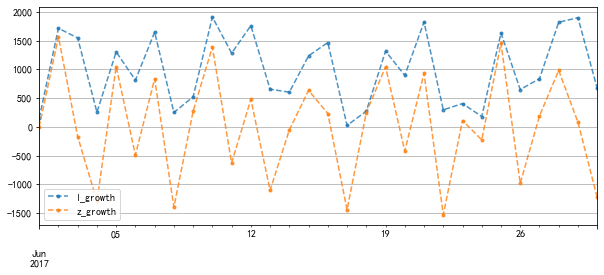

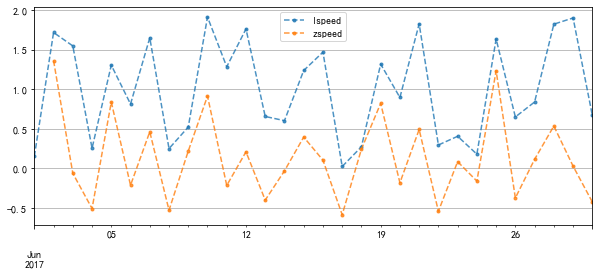

In [10]:
# 创建数据 → 30天内A产品的销售情况
data = pd.DataFrame({'A':np.random.rand(30)*2000+1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')


data['base'] = 1000  # 假设基期销售额为1000，后面每一天都为计算期
data['l_growth'] = data['A'] - data['base']  # 累计增长量 = 报告期水平 - 固定基期水平
data['z_growth'] = data['A'] - data.shift(1)['A']  # 逐期增长量 = 报告期水平 - 报告期前一期水平
data[data.isnull()] = 0  # 替换缺失值

# 通过折线图查看增长量情况
data[['l_growth','z_growth']].plot(figsize = (10,4),style = '--.',alpha = 0.8)  

plt.legend(loc = 'lower left')
plt.grid()

# 通过折线图查看发展速度
data['lspeed'] = data['l_growth'] / data['base']  # 定基增长速度
data['zspeed'] = data['z_growth'] / data.shift(1)['A']  # 环比增长速度
data[['lspeed','zspeed']].plot(figsize = (10,4),style = '--.',alpha = 0.8)  

plt.grid()
print(data.head())
print('------')
